In [1]:
import pickle
import pandas as pd
X_train = pd.read_csv('../data/X_train_trans.csv', index_col=0)
pickle_in = open('../data/y_train.pickle', 'rb')
y_train = pickle.load(pickle_in)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTENC

In [2]:
list(enumerate(X_train.columns.tolist()));
categoricals = list(range(18, len(X_train.columns)))

In [3]:
sm = SMOTENC(random_state=3, categorical_features=categoricals)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [5]:
clf.fit(X_sm,y_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [6]:
features = X_sm.columns.tolist()

In [7]:
from sklearn.tree.export import export_text

r = export_text(clf, feature_names= features)
print(r)

|--- total_charge <= 1.39
|   |--- customer_service_calls <= 1.10
|   |   |--- x2_yes <= 0.50
|   |   |   |--- total_intl_calls <= -0.60
|   |   |   |   |--- total_intl_calls <= -1.00
|   |   |   |   |   |--- total_day_minutes <= 0.62
|   |   |   |   |   |   |--- total_day_calls <= -2.30
|   |   |   |   |   |   |   |--- total_night_minutes <= 0.47
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- total_night_minutes >  0.47
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- total_day_calls >  -2.30
|   |   |   |   |   |   |   |--- total_night_calls <= 0.19
|   |   |   |   |   |   |   |   |--- total_eve_charge <= 2.43
|   |   |   |   |   |   |   |   |   |--- x0_TX <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- total_eve_minutes <= 1.97
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- total_eve_minutes >  1.97
|   |   |   |   |   |   |   |   |   |   |   |---

/Users/viviandang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [8]:
clf.tree_.node_count

361

In [9]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=features,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Churn_DTree_SMOTE")

'Churn_DTree_SMOTE.pdf'

In [10]:
y_pred_sm = clf.predict(X_sm)

In [11]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [12]:
print ('accuracy score:', clf.score(X_sm, y_sm))
print ('recall:', recall_score(y_sm, y_pred_sm))
print ('precision:', precision_score(y_sm, y_pred_sm))
print ('f1:', f1_score(y_sm, y_pred_sm))

accuracy score: 1.0
recall: 1.0
precision: 1.0
f1: 1.0


### Hyperparameter with Gridsearch
- The best value for max_dept is 5

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
tree_clf = DecisionTreeClassifier()

max_depth_params = range(2, 12)

max_features_param = [None, 'auto', 'sqrt', 'log2']

param_grid = {'max_depth': max_depth_params, 'max_features': max_features_param}

gridsearch = GridSearchCV(estimator = tree_clf, 
                          param_grid = param_grid,
                          n_jobs = -1, #parallel computation
                          verbose = 1, #give feedback
                          cv = 10, #cross-validate 10 times
                          scoring = 'precision', #can use multiple scoring  , recall, precision..ect
                          return_train_score= True)

gridsearch = gridsearch.fit(X_sm, y_sm)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.9s finished


In [15]:
## let's see best score and best parameters

gridsearch.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
gridsearch.best_score_

0.9957922380607638

In [17]:
gridsearch.cv_results_

{'mean_fit_time': array([0.1085974 , 0.02023454, 0.01324265, 0.01390572, 0.04452689,
        0.01462305, 0.01251271, 0.01259532, 0.05826097, 0.01567082,
        0.01733491, 0.01271241, 0.05825157, 0.01462653, 0.01284852,
        0.01117885, 0.06602407, 0.01462371, 0.01514034, 0.0154345 ,
        0.07281952, 0.0153259 , 0.01412694, 0.01387396, 0.07724156,
        0.01598947, 0.01531856, 0.01475227, 0.08085279, 0.01595182,
        0.01665378, 0.01283128, 0.08150864, 0.01776471, 0.01733119,
        0.01548445, 0.0656564 , 0.0160934 , 0.01565127, 0.01164494]),
 'std_fit_time': array([0.01017061, 0.00764549, 0.00138849, 0.00165201, 0.00803255,
        0.00184198, 0.00160326, 0.00251985, 0.0066068 , 0.00312655,
        0.00403131, 0.00276423, 0.00430669, 0.00250735, 0.00135876,
        0.00145408, 0.00856877, 0.00197116, 0.00342199, 0.00543772,
        0.00382264, 0.00196105, 0.00167031, 0.00290324, 0.00257044,
        0.00187579, 0.00189947, 0.00306979, 0.00865522, 0.00199424,
        0.002

In [18]:
colums = ['params', 'mean_test_score', 
          'std_test_score', 'rank_test_score',
          'mean_train_score', 'std_train_score']

log_reg_results = pd.DataFrame(gridsearch.cv_results_)[colums]
log_reg_results.sort_values(by = 'rank_test_score').head(10)

,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
12,"{'max_depth': 5, 'max_features': None}",0.995792,0.004667,1,0.999469,0.001593
20,"{'max_depth': 7, 'max_features': None}",0.984369,0.010566,2,0.994836,0.003070
16,"{'max_depth': 6, 'max_features': None}",0.982739,0.018836,3,0.991243,0.007199
24,"{'max_depth': 8, 'max_features': None}",0.960042,0.019008,4,0.977845,0.006614
28,"{'max_depth': 9, 'max_features': None}",0.958956,0.020150,5,0.982473,0.006691
32,"{'max_depth': 10, 'max_features': None}",0.948819,0.019264,6,0.979815,0.008823
36,"{'max_depth': 11, 'max_features': None}",0.948680,0.020939,7,0.985696,0.004217
0,"{'max_depth': 2, 'max_features': None}",0.939518,0.017487,8,0.938514,0.001974
8,"{'max_depth': 4, 'max_features': None}",0.939153,0.032081,9,0.946612,0.026384
4,"{'max_depth': 3, 'max_features': None}",0.930049,0.018558,10,0.930545,0.001699


In [19]:
log_reg_results.shape

(40, 6)

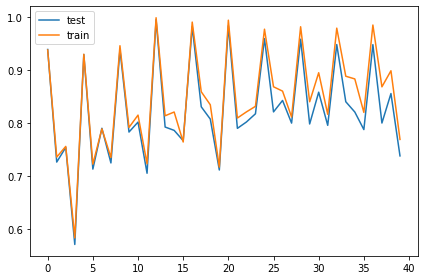

In [20]:
roc_test_scores = gridsearch.cv_results_['mean_test_score']

roc_training_scores = gridsearch.cv_results_['mean_train_score']

plt.plot(range(40), roc_test_scores, label = 'test')
plt.plot(range(40), roc_training_scores, label = 'train')


plt.legend()
plt.tight_layout()

In [21]:
tuned_clf = DecisionTreeClassifier(max_depth = 5)

In [22]:
tuned_clf.fit(X_sm,y_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
features2 = X_sm.columns.tolist()

In [24]:
tuned_clf.tree_.node_count

35

In [25]:

dot_data = tree.export_graphviz(tuned_clf, out_file=None, 
                     feature_names=features2,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Tuned_DTree_SMOTE")

'Tuned_DTree_SMOTE.pdf'

In [26]:
y_pred_sm = tuned_clf.predict(X_sm)

In [27]:
print ('accuracy:', tuned_clf.score(X_sm, y_sm))
print ('recall:', recall_score(y_sm, y_pred_sm))
print ('precision:', precision_score(y_sm, y_pred_sm))
print ('f1:', f1_score(y_sm, y_pred_sm))

accuracy: 0.9157894736842105
recall: 0.8315789473684211
precision: 1.0
f1: 0.9080459770114944


In [28]:
import warnings
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10, 5]

# from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion Matrix, without normalization
[[1995    0]
 [ 336 1659]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1995
           1       1.00      0.83      0.91      1995

    accuracy                           0.92      3990
   macro avg       0.93      0.92      0.92      3990
weighted avg       0.93      0.92      0.92      3990



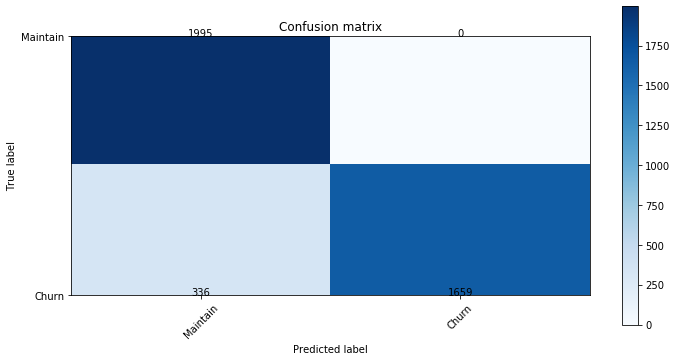

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_sm, y_pred_sm)
classes = ['Maintain', 'Churn']
plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix')

#Checking performance our model with classification report.
print(classification_report(y_sm, y_pred_sm))

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tuned_clf, X_sm, y_sm, cv=5, scoring= 'precision')
np.average(scores)

0.9946174543043733